In [35]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

sys.path.append("..")
from cv.locator import DroneLocator
from cv.dewarp import dewarp


imgs_path = "../imgs/m4/"
landing_preds_path = os.path.join(imgs_path, "landingPadCaptures")
landing_pad_imgs = (
    [
        os.path.join(landing_preds_path, name) 
        for name in os.listdir(landing_preds_path)
    ]
)

gantry_preds_path = os.path.join(imgs_path, "end_offsets")
gantry_imgs = (
    [
        os.path.join(gantry_preds_path, name) 
        for name in os.listdir(gantry_preds_path)
    ]
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


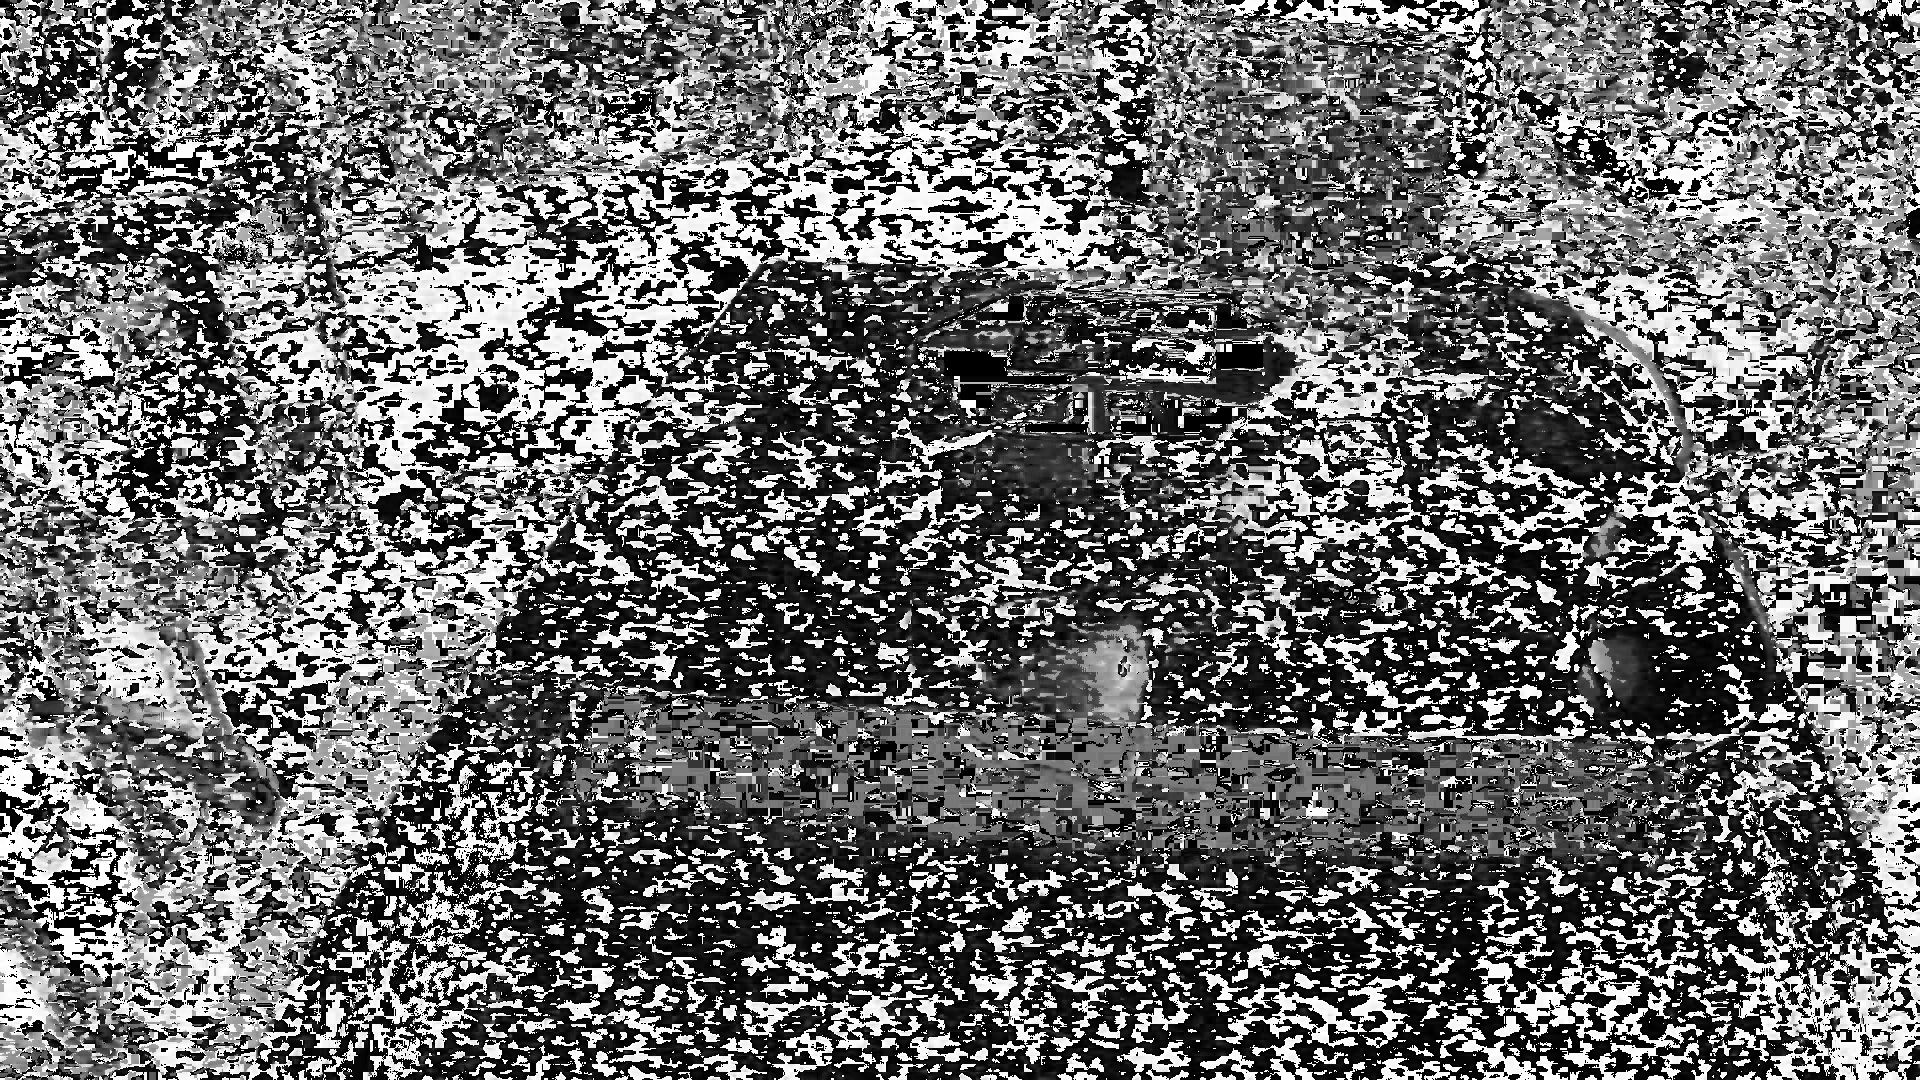

In [68]:
from PIL import Image
w_drone = plt.imread(landing_pad_imgs[3])
wout_drone = plt.imread(landing_pad_imgs[2])

w_drone = cv2.cvtColor(w_drone, cv2.COLOR_RGB2GRAY)
wout_drone = cv2.cvtColor(wout_drone, cv2.COLOR_RGB2GRAY)

oi[oi < 0] = 0

# oi = cv2.cvtColor(oi, cv2.COLOR_HSV2RGB)
Image.fromarray(oi)

In [3]:
from torchvision.models import resnet18
import torch
m = resnet18(pretrained=True)
m.fc = torch.nn.Sequential(*[torch.nn.Linear(512, 2), torch.nn.Softmax(dim=1)])


In [5]:
from torchvision import transforms as T

In [23]:
w_drone = plt.imread(landing_pad_imgs[3])
wout_drone = plt.imread(landing_pad_imgs[2])
transform = T.Compose([
                    T.ToTensor(),
                    T.Resize(256),
                    T.CenterCrop(224),
#                     T.Normalize(
#                         mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
#                     ),
                    T.RandomRotation(10),
                ]
            )
m(torch.cat([torch.tensor(transform(w_drone)).unsqueeze(0), torch.tensor(transform(wout_drone)).unsqueeze(0)], dim=0))



/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


tensor([[0.0200, 0.9800],
        [0.0139, 0.9861]], grad_fn=<SoftmaxBackward>)

In [24]:
results = m(torch.cat([torch.tensor(transform(w_drone)).unsqueeze(0), torch.tensor(transform(wout_drone)).unsqueeze(0)], dim=0))

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [25]:
results.shape
ce = torch.nn.CrossEntropyLoss()

In [43]:
import numpy as np
import torch
from torchvision.models import resnet18
import torch
from tqdm.notebook import tqdm

m = resnet18(pretrained=True)
m.fc = torch.nn.Sequential(*[torch.nn.Linear(512, 2), torch.nn.Softmax(dim=1)])
# drone = set([0, 1, 3, 4, 5, 7, 8, 9])
drone=set([
    3, 5, 7, 8, 12, 13, 18, 19, 20, 21, 22, 23, 25, 27, 28, 33, 35, 36, 37, 41, 42, 44, 45, 46, 50, 51,52, 53, 
])

transform = T.Compose([
                    T.ToTensor(),
                    T.Resize(256),
                    T.CenterCrop(224),
#                     T.Normalize(
#                         mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
#                     ),
                    T.RandomRotation(10),
                ]
            )

o = torch.optim.Adam(m.parameters(), lr=0.0001,weight_decay=0.0001)

for epoch in range(25):
    l_sum = 0.0
    correct=0.0

    for i in tqdm(range(len(landing_pad_imgs))):#indices:
        im = plt.imread(landing_pad_imgs[i])
        o.zero_grad()

        pred = m(transform(im).unsqueeze(0))
        if i in drone:
            loss = ce(pred, torch.tensor([1]))
            if pred[0][1] > 0.5:
                correct+=1
        else:
            loss = ce(pred, torch.tensor([0]))
            if pred[0][0] > 0.5:
                correct+=1
        l_sum += loss.item()
        loss.backward()
        o.step()
    print(f"{epoch} : {l_sum/len(landing_pad_imgs)} | acc: {correct/len(landing_pad_imgs)}")


0 : 0.6237930259921334 | acc: 0.6909090909090909



1 : 0.44469690810550344 | acc: 1.0



2 : 0.3749147469347173 | acc: 0.9818181818181818



3 : 0.3456282155080275 | acc: 1.0



4 : 0.33154777505181054 | acc: 1.0


KeyboardInterrupt: 

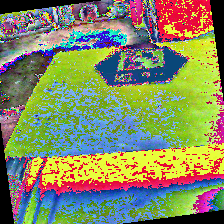

In [22]:
transform_test = T.Compose([
                    T.ToTensor(),
                    T.Resize(256),
                    T.CenterCrop(224),
                    T.Normalize(
                        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                    ),
                    T.RandomRotation(10),
                ]
            )
topil(transform_test(wout_drone))

In [17]:
topil = T.ToPILImage()

In [31]:
m(transform(w_drone).unsqueeze(0))

tensor([[0.0080, 0.9920]], grad_fn=<SoftmaxBackward>)

In [44]:
torch.save(m.state_dict(), "../cv/landing.pt")

In [45]:
# for i, path in enumerate(landing_pad_imgs):
#     print(i)
#     plt.imshow(plt.imread(path))
#     plt.show()
#     print("------")